In [31]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#load the dataset
df = sns.load_dataset("titanic")

# # Basic information

In [4]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [11]:
#find the missing value
df.isnull().sum().sort_values(ascending=False)

deck           688
age            177
embarked         2
embark_town      2
sex              0
pclass           0
survived         0
fare             0
parch            0
sibsp            0
class            0
adult_male       0
who              0
alive            0
alone            0
dtype: int64

In [15]:
# in persontage
(df.isnull().sum()/len(df)*100).sort_values(ascending=False)

deck           77.216611
age            19.865320
embarked        0.224467
embark_town     0.224467
sex             0.000000
pclass          0.000000
survived        0.000000
fare            0.000000
parch           0.000000
sibsp           0.000000
class           0.000000
adult_male      0.000000
who             0.000000
alive           0.000000
alone           0.000000
dtype: float64

<Axes: >

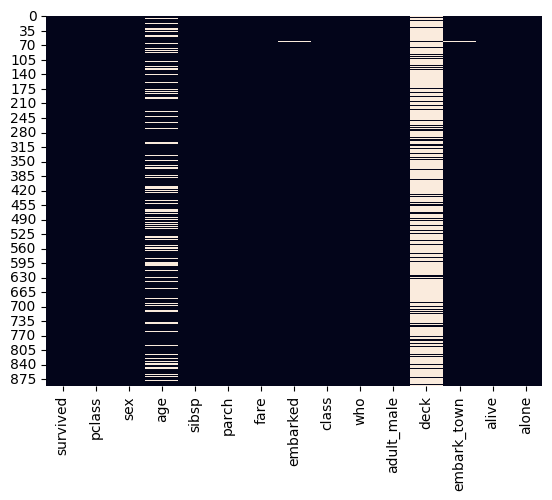

In [17]:
# show the missing value in heatmap
sns.heatmap(df.isnull(), cbar=False)

In [19]:
df['sex'].unique()

array(['male', 'female'], dtype=object)

In [20]:
df[["sex","age"]]

,sex,age
0,male,22.0
1,female,38.0
2,female,26.0
3,female,35.0
4,male,35.0
...,...,...
886,male,27.0
887,female,19.0
888,female,NaN
889,male,26.0


In [21]:
# check number of all unqiue in data
df.nunique()

survived         2
pclass           3
sex              2
age             88
sibsp            7
parch            7
fare           248
embarked         3
class            3
who              3
adult_male       2
deck             7
embark_town      3
alive            2
alone            2
dtype: int64

In [22]:
df["embarked"].value_counts()

embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [23]:
df['alive'].value_counts()

alive
no     549
yes    342
Name: count, dtype: int64

In [25]:
df.groupby(["class","sex"])['fare'].mean()

/var/folders/gh/zp111p4101v_s7gkt1_mzkym0000gn/T/ipykernel_52702/2340824340.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["class","sex"])['fare'].mean()


class   sex   
First   female    106.125798
        male       67.226127
Second  female     21.970121
        male       19.741782
Third   female     16.118810
        male       12.661633
Name: fare, dtype: float64

In [28]:
# coralation
coralation=df[['fare','age', 'sibsp', 'parch']].corr()

<Axes: >

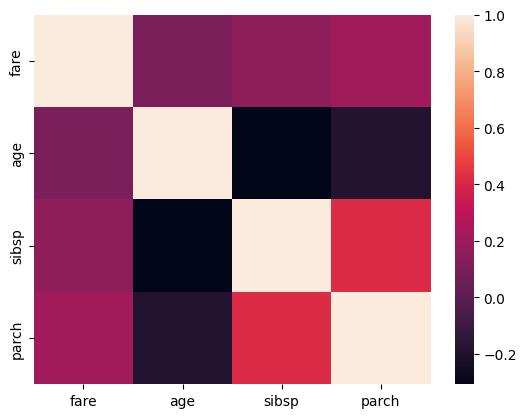

In [29]:
sns.heatmap(coralation)

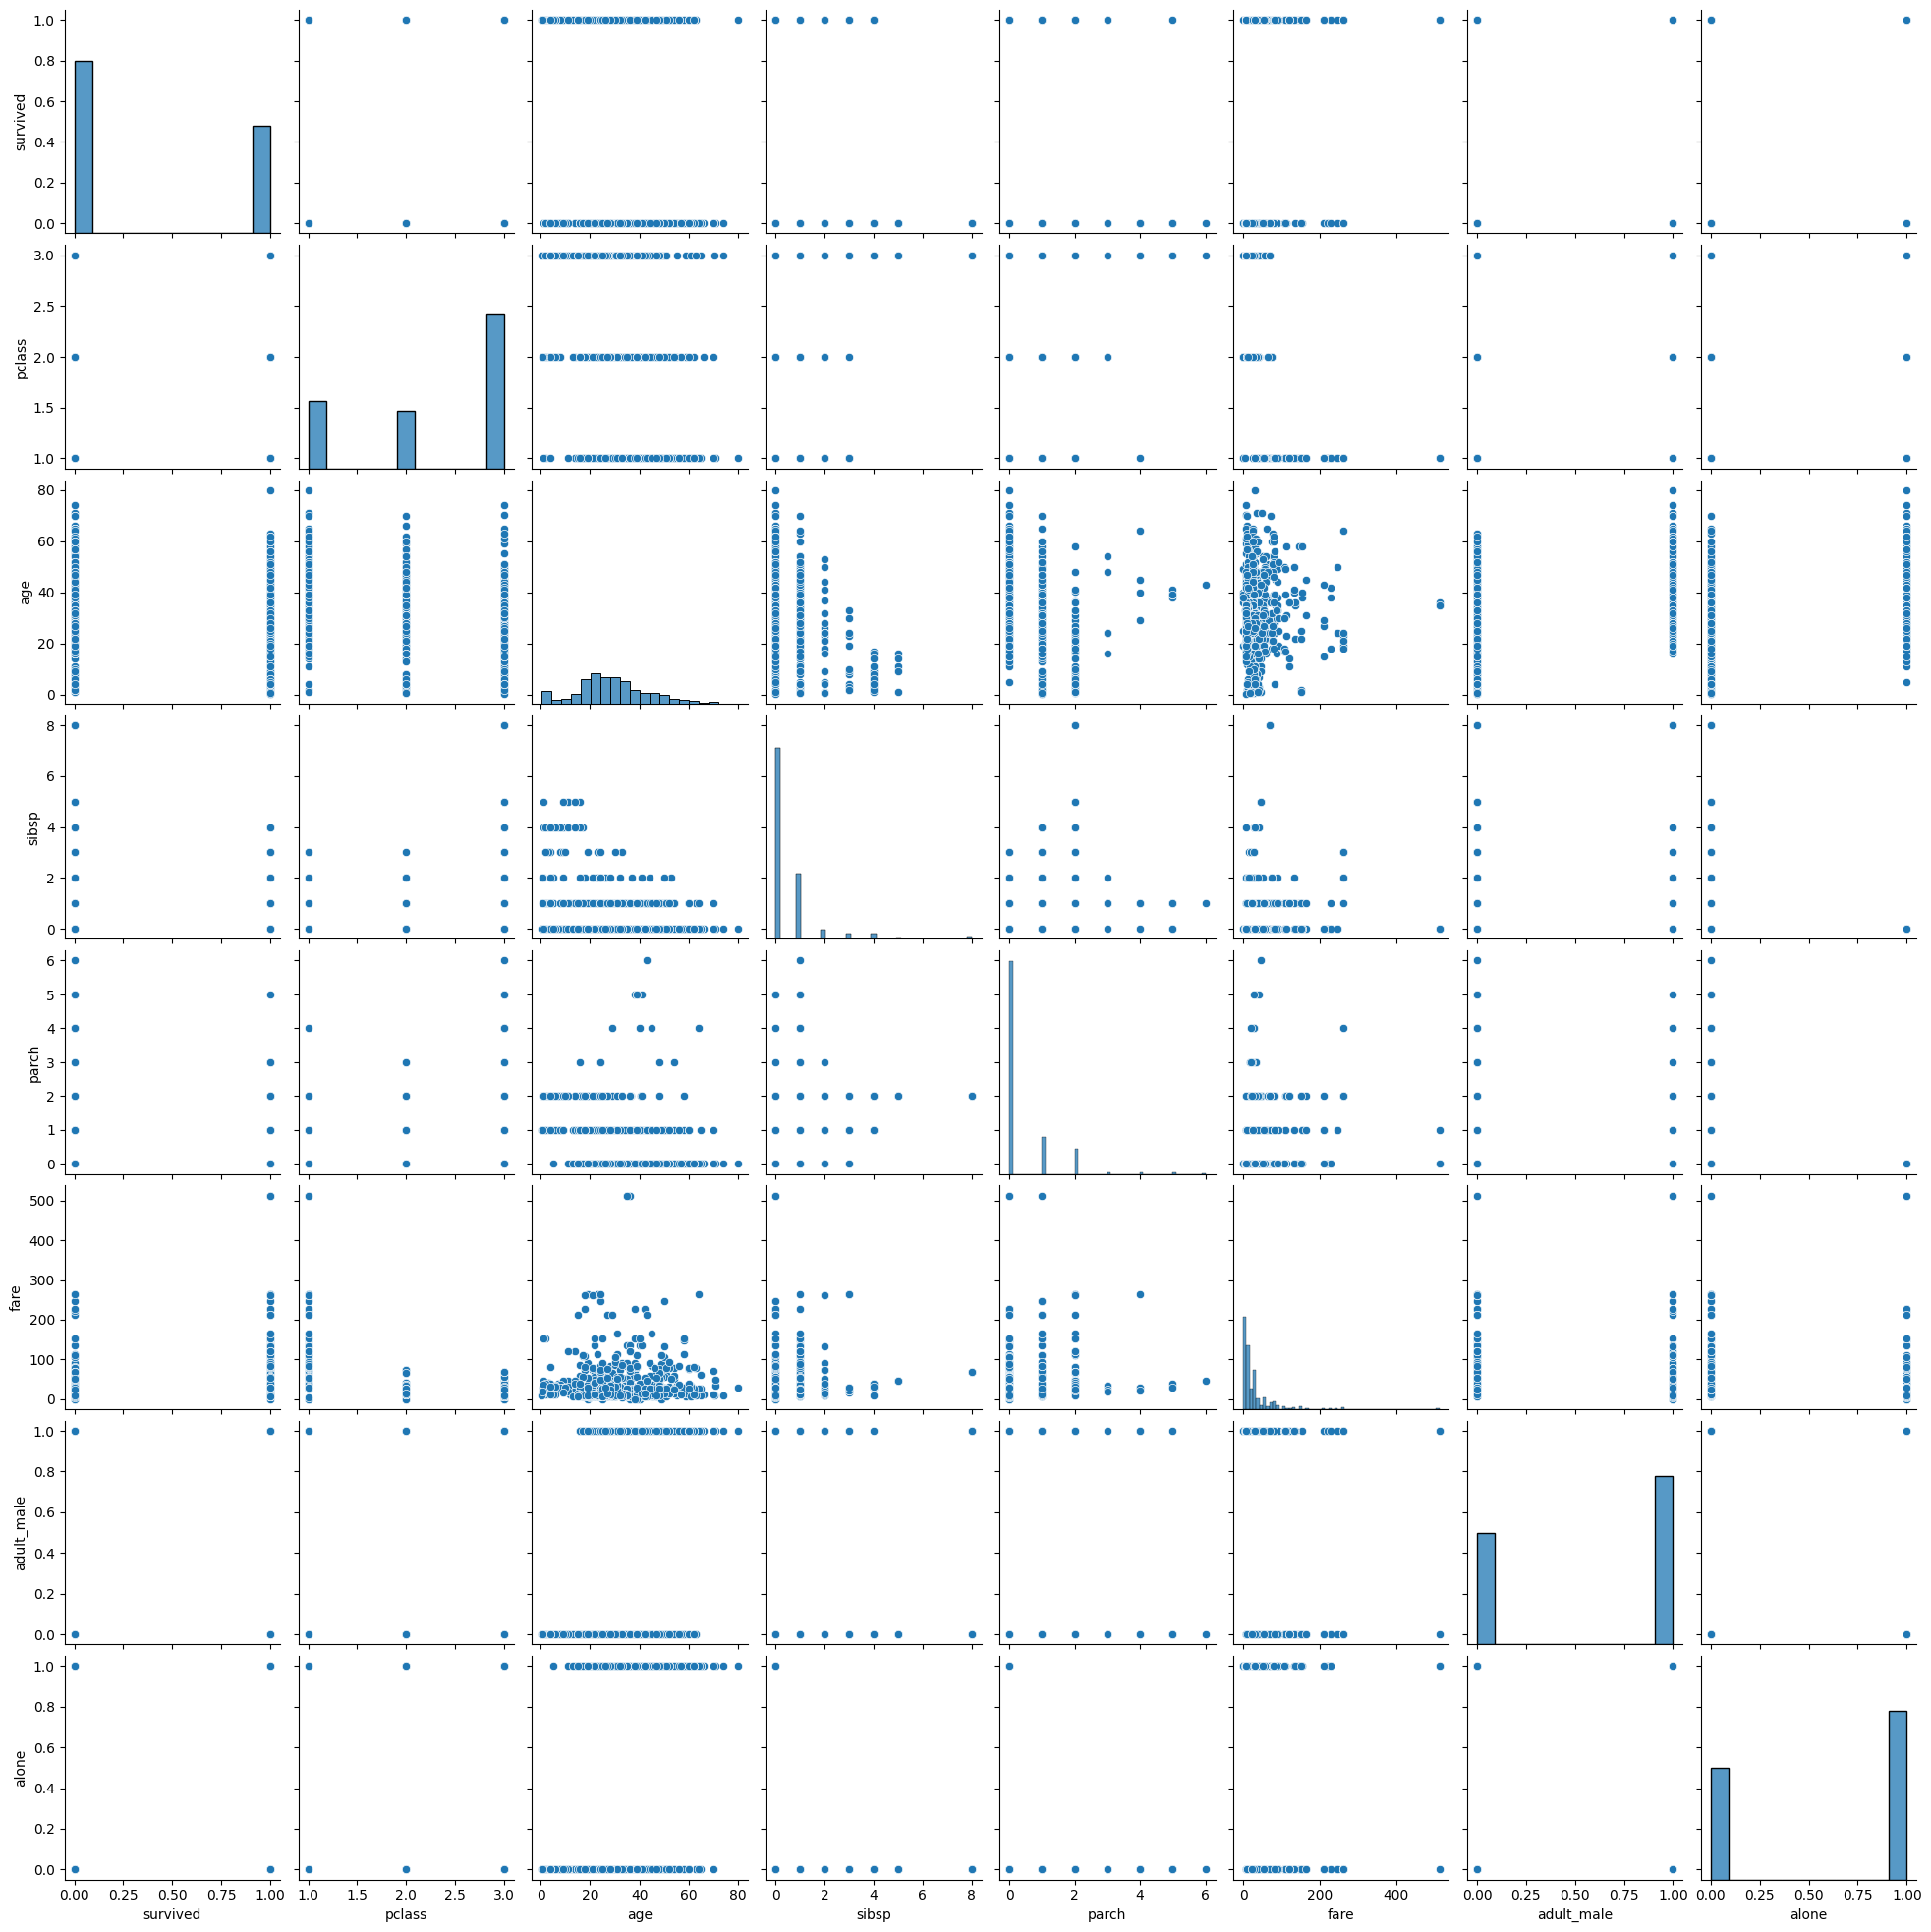

In [30]:
sns.pairplot(df)

In [33]:
# drop the deck column
df.drop("deck", axis=1, inplace=True)

In [34]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

In [35]:
# filling the age columns 
df['age'].fillna(df['age'].mean(), inplace=True)

/var/folders/gh/zp111p4101v_s7gkt1_mzkym0000gn/T/ipykernel_52702/2714550905.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].mean(), inplace=True)


In [38]:
df.isnull().sum().sort_values(ascending=False)

embark_town    2
embarked       2
sex            0
age            0
survived       0
pclass         0
parch          0
sibsp          0
class          0
fare           0
who            0
adult_male     0
alive          0
alone          0
dtype: int64

In [39]:
df['age'].mean()

np.float64(29.69911764705882)

In [40]:
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

In [41]:
df['embark_town'].fillna(df['embark_town'].mode()[0], inplace=True)

<Axes: >

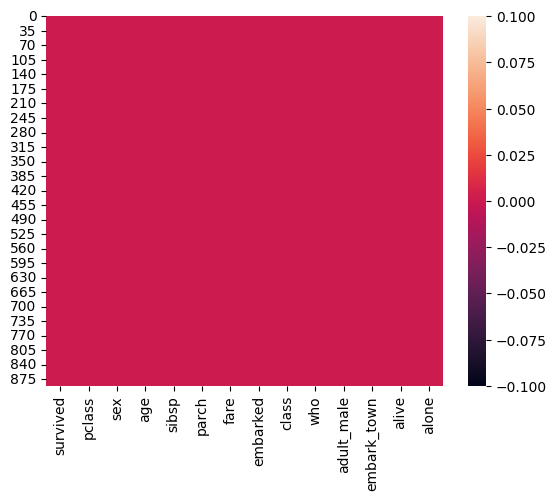

In [42]:
sns.heatmap(df.isnull())

<Axes: xlabel='age', ylabel='Count'>

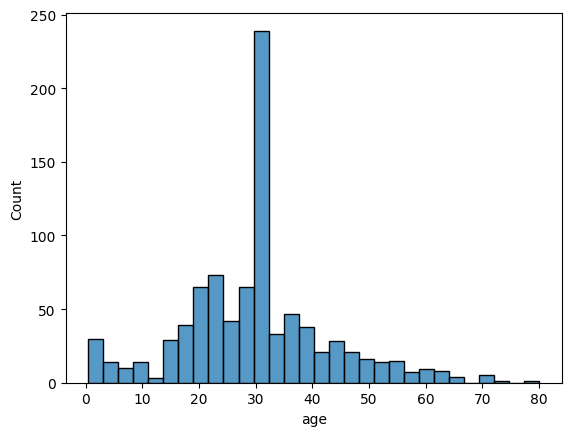

In [43]:
sns.histplot(df['age'])

In [44]:
# bining the data 
bins = [0, 1, 5, 12, 18, 30, 50, 80]
labels = ["Infants", "Toddlers","Teens", "Kids", "Youngs",  "Middle Aged",  "old" ]

In [45]:
pd.cut(df['age'], bins=bins, labels=labels)

0           Youngs
1      Middle Aged
2           Youngs
3      Middle Aged
4      Middle Aged
          ...     
886         Youngs
887         Youngs
888         Youngs
889         Youngs
890    Middle Aged
Name: age, Length: 891, dtype: category
Categories (7, object): ['Infants' < 'Toddlers' < 'Teens' < 'Kids' < 'Youngs' < 'Middle Aged' < 'old']

featurs engeering

In [46]:
df['binned_age'] = pd.cut(df['age'], bins=bins, labels=labels)

In [47]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,binned_age
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,Youngs
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,Middle Aged
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,Youngs
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,Middle Aged
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,Middle Aged


In [48]:
df['binned_age'].value_counts()

binned_age
Youngs         447
Middle Aged    241
Kids            70
old             64
Toddlers        30
Teens           25
Infants         14
Name: count, dtype: int64

In [50]:
#change the columns name
df.rename(columns={"binned_age": "Age_group"}, inplace=True)

In [51]:
# make i new dataset
df_1 = df[['survived', 'class', 'Age_group']]

In [52]:
df_1[df_1['class']=='First']

,survived,class,Age_group
1,1,First,Middle Aged
3,1,First,Middle Aged
6,0,First,old
11,1,First,old
23,1,First,Youngs
...,...,...,...
871,1,First,Middle Aged
872,0,First,Middle Aged
879,1,First,old
887,1,First,Youngs
